In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# DATA COLLECTION

In [3]:
df=pd.read_csv('Train.csv')
df.head()
df.shape

(3499, 12)

# DATA PREPROCESSING

In [4]:

df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
df.dropna(how='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3494,3495,A,Ship,3,4,113,3,medium,M,1,5765,1
3495,3496,B,Ship,4,1,134,2,medium,F,7,5967,0
3496,3497,C,Ship,4,3,228,2,high,F,4,4719,1
3497,3498,F,Ship,3,4,204,2,low,F,10,5844,1


In [7]:
df.shape

(3499, 12)

# CHECKING AND REMOVING OUTLIERS

<Axes: xlabel='Cost_of_the_Product'>

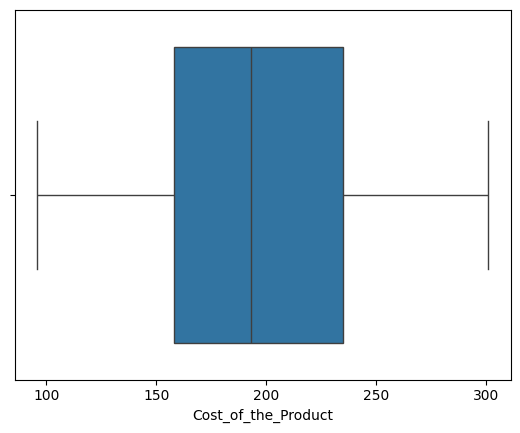

In [8]:
sns.boxplot(df['Cost_of_the_Product'],orient='h')


<Axes: xlabel='Discount_offered'>

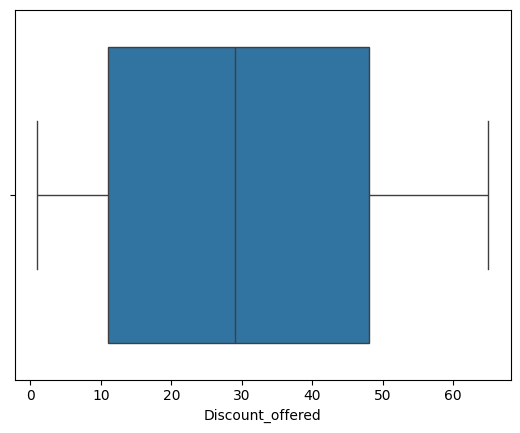

In [9]:
sns.boxplot(df['Discount_offered'],orient='h')

In [10]:
#finding IQR
Q1 = df['Discount_offered'].quantile(0.25)
Q3 = df['Discount_offered'].quantile(0.75)
IQR=Q3-Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df[(df.Discount_offered<lower_limit)|(df.Discount_offered>upper_limit)]
df=df[(df.Discount_offered>lower_limit)&(df.Discount_offered<upper_limit)]
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3494,3495,A,Ship,3,4,113,3,medium,M,1,5765,1
3495,3496,B,Ship,4,1,134,2,medium,F,7,5967,0
3496,3497,C,Ship,4,3,228,2,high,F,4,4719,1
3497,3498,F,Ship,3,4,204,2,low,F,10,5844,1


<Axes: xlabel='Discount_offered'>

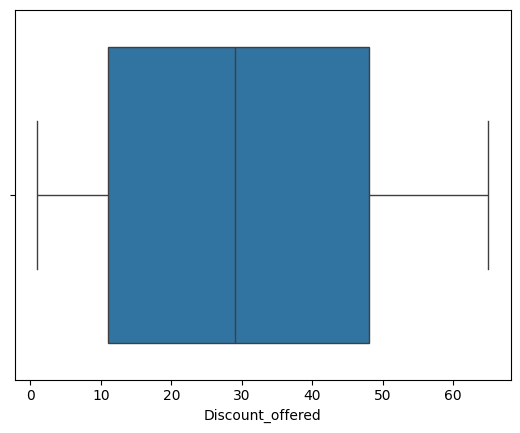

In [11]:
sns.boxplot(df['Discount_offered'],orient='h')

<Axes: xlabel='Weight_in_gms'>

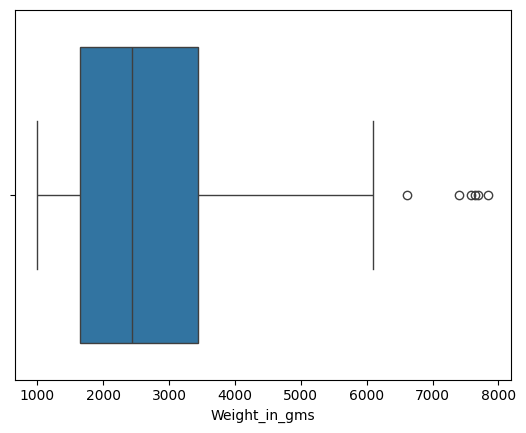

In [12]:
sns.boxplot(df['Weight_in_gms'],orient='h')

In [13]:
# df.drop(columns=['ID','Gender','Customer_care_calls','Discount_offered','Prior_purchases'],inplace=True)
df.drop(columns=['ID','Gender'],inplace=True)

# DATA VISUALIZATION

(array([ 203.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3296.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

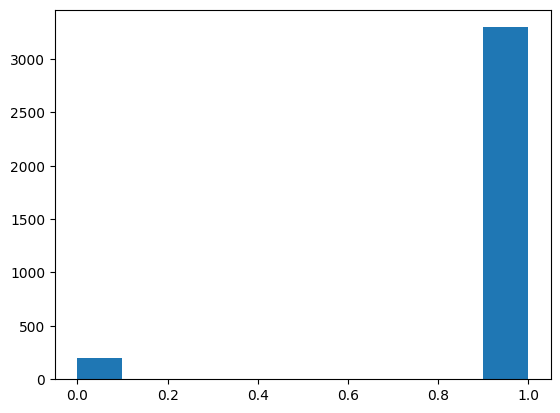

In [14]:
import matplotlib.pyplot as plt
plt.hist(df['Reached.on.Time_Y.N'])

In [15]:
df['Reached.on.Time_Y.N'].count()

3499

In [16]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000
mean,3.744498,2.980852,196.433552,3.300086,30.191197,2622.202629,0.941983
std,0.990749,1.409528,45.642010,1.511052,19.822390,1187.071836,0.233808
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,158.000000,2.000000,11.000000,1641.500000,1.000000
50%,4.000000,3.000000,193.000000,3.000000,29.000000,2438.000000,1.000000
75%,4.000000,4.000000,235.000000,4.000000,48.000000,3446.000000,1.000000
max,7.000000,5.000000,301.000000,10.000000,65.000000,7846.000000,1.000000


In [17]:
hm=df.corr(numeric_only=True)

<Axes: >

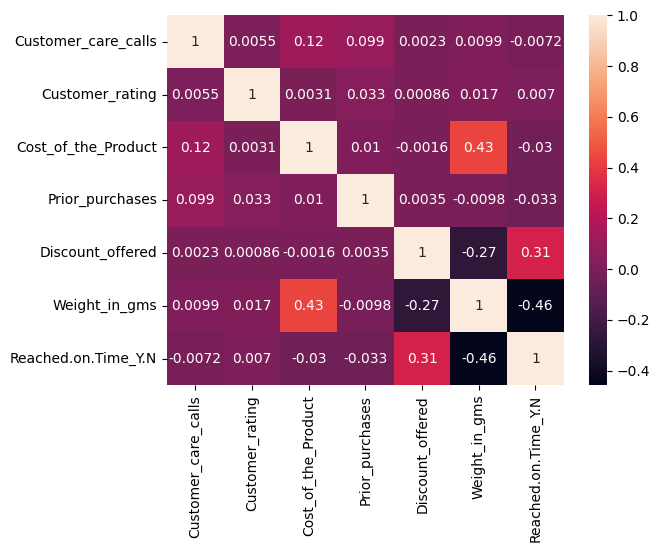

In [18]:

sns.heatmap(hm,annot=True)

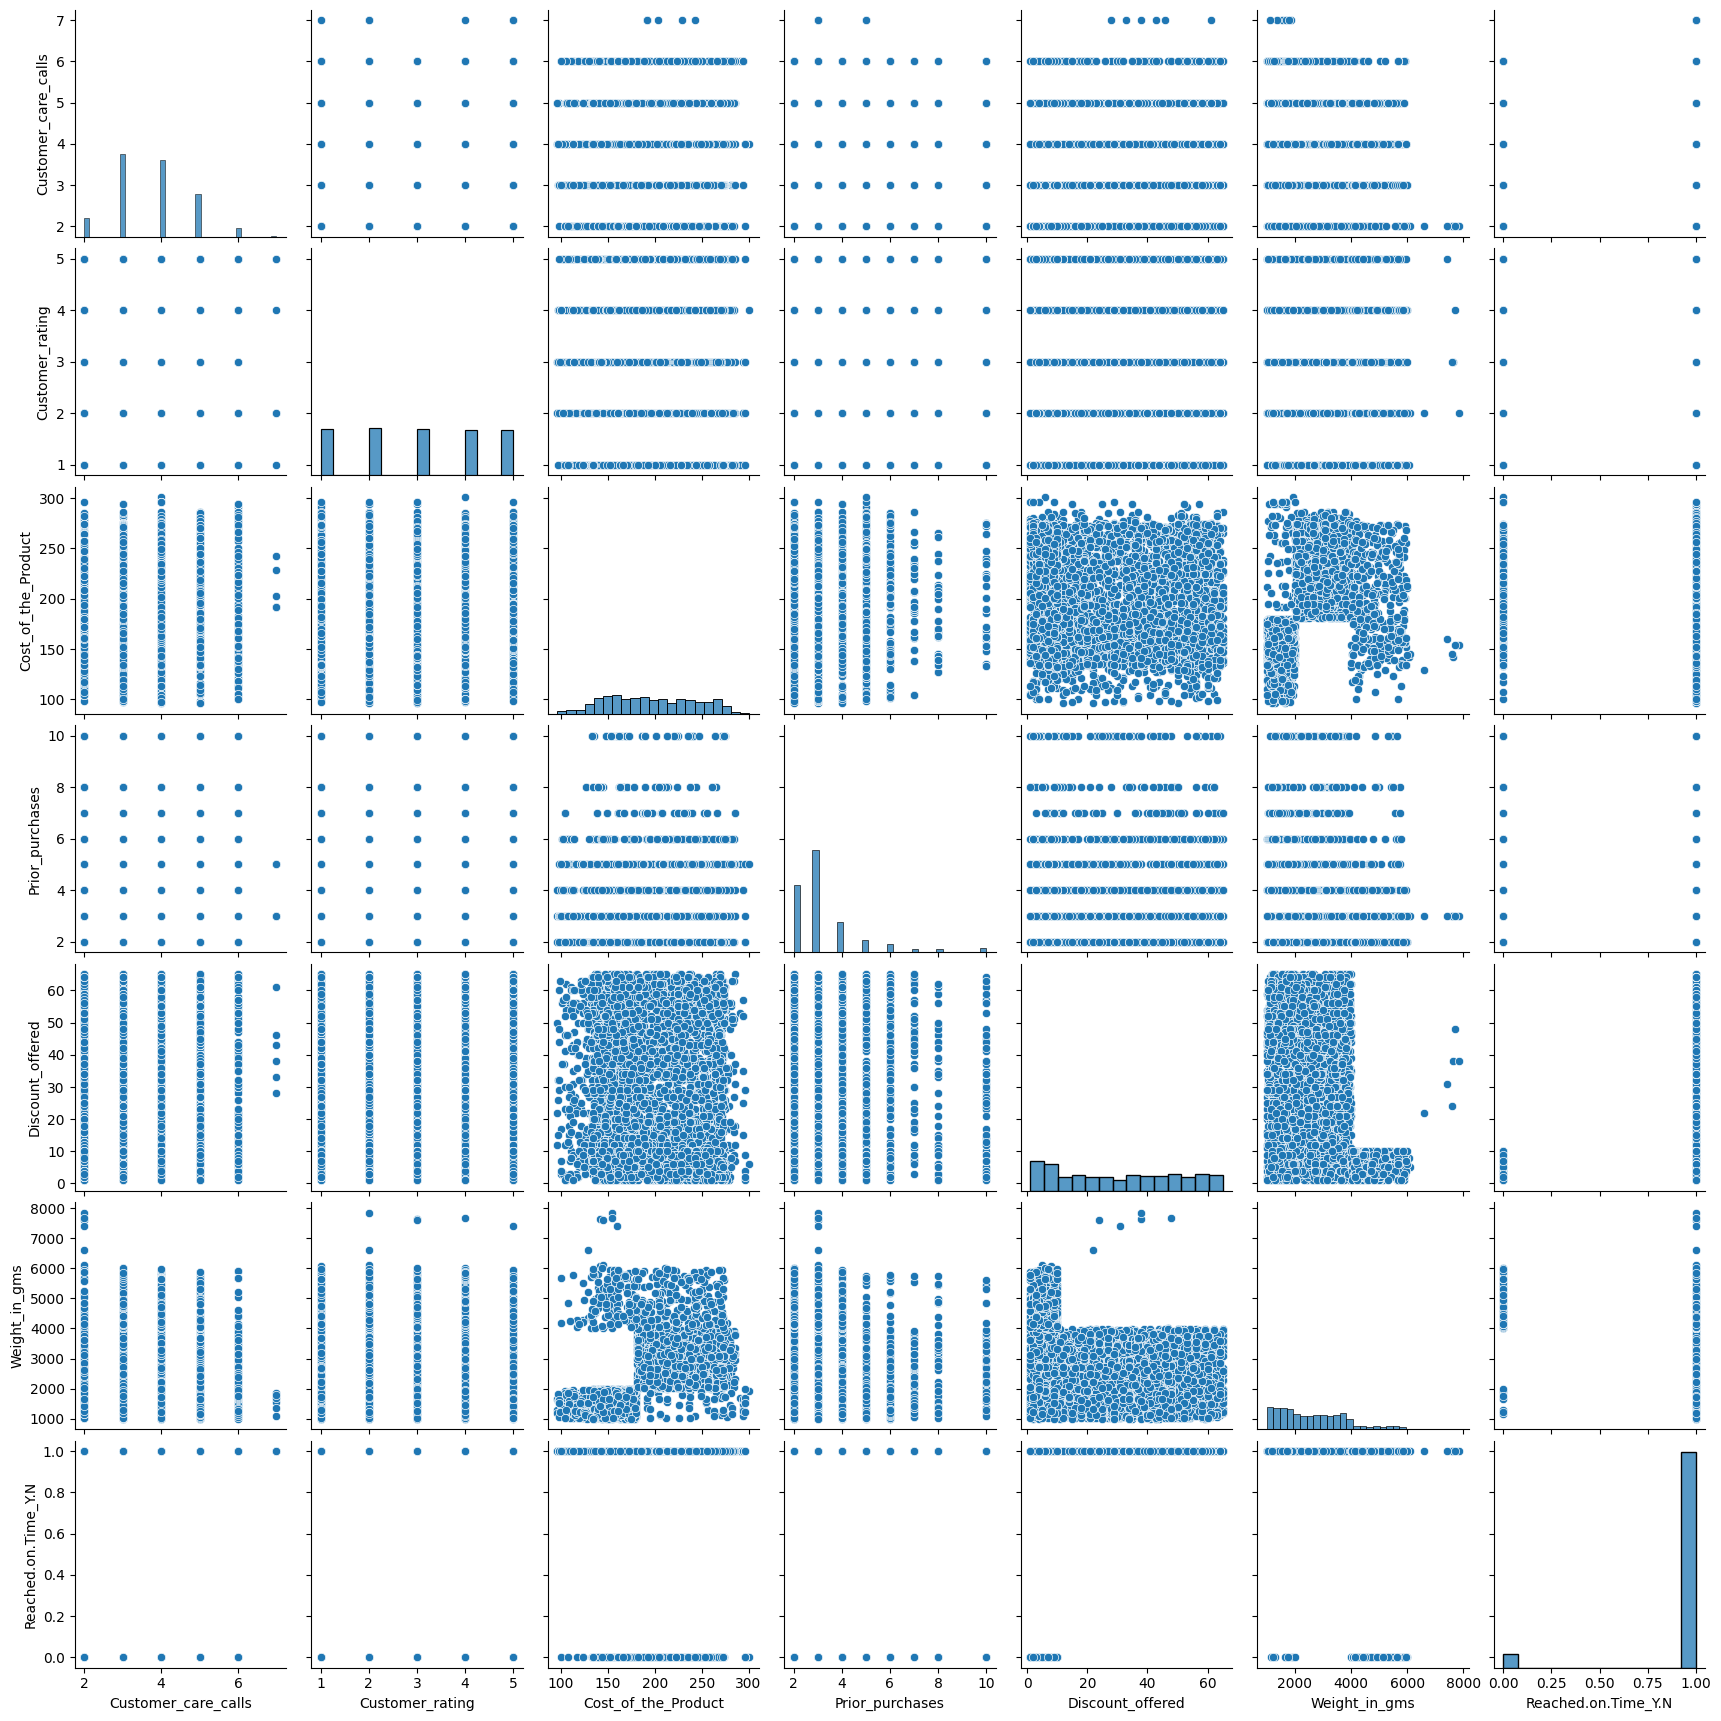

In [19]:
sns.pairplot(df)

# SPLITTING DATA INTO X AND Y

In [20]:
x=df.iloc[:,:-1]
y=df['Reached.on.Time_Y.N']
x

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,D,Flight,4,2,177,3,low,44,1233
1,F,Flight,4,5,216,2,low,59,3088
2,A,Flight,2,2,183,4,low,48,3374
3,B,Flight,3,3,176,4,medium,10,1177
4,C,Flight,2,2,184,3,medium,46,2484
...,...,...,...,...,...,...,...,...,...
3494,A,Ship,3,4,113,3,medium,1,5765
3495,B,Ship,4,1,134,2,medium,7,5967
3496,C,Ship,4,3,228,2,high,4,4719
3497,F,Ship,3,4,204,2,low,10,5844


In [21]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3494    1
3495    0
3496    1
3497    1
3498    0
Name: Reached.on.Time_Y.N, Length: 3499, dtype: int64

# DATA ENCODING

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Warehouse_block']=le.fit_transform(x['Warehouse_block'])
x['Mode_of_Shipment']=le.fit_transform(x['Mode_of_Shipment'])
x['Product_importance']=le.fit_transform(x['Product_importance'])
x.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,3,0,4,2,177,3,1,44,1233
1,4,0,4,5,216,2,1,59,3088
2,0,0,2,2,183,4,1,48,3374
3,1,0,3,3,176,4,2,10,1177
4,2,0,2,2,184,3,2,46,2484
5,4,0,3,1,162,3,2,12,1417
6,3,0,3,4,250,3,1,3,2371
7,4,0,4,1,233,2,1,48,2804
8,0,0,3,4,150,3,1,11,1861
9,1,0,3,2,164,3,2,29,1187


# SMOTE FOR DATA HANDLING

In [23]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_res,y_res=smote.fit_resample(x,y)

In [24]:
x_res.count()

Warehouse_block        6592
Mode_of_Shipment       6592
Customer_care_calls    6592
Customer_rating        6592
Cost_of_the_Product    6592
Prior_purchases        6592
Product_importance     6592
Discount_offered       6592
Weight_in_gms          6592
dtype: int64

In [25]:
y_res.count()

6592

# DATA SCALING

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_res=sc.fit_transform(x_res)
x_res

array([[ 0.58520767, -1.75174285,  0.4244153 , ..., -0.23920252,
         1.3342347 , -1.57839187],
       [ 1.29722113, -1.75174285,  0.4244153 , ..., -0.23920252,
         2.11512532, -0.36589089],
       [-1.55083272, -1.75174285, -1.75621263, ..., -0.23920252,
         1.5424722 , -0.17895003],
       ...,
       [ 0.58520767, -0.48236956, -0.66589867, ..., -1.76565271,
        -0.64402153,  1.09107122],
       [ 0.58520767,  0.78700374, -0.66589867, ..., -0.23920252,
        -0.53990278,  0.74072053],
       [-0.1268058 , -0.48236956, -0.66589867, ..., -0.23920252,
        -0.85225903,  0.82569364]])

# splitting the dataset

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=100)
x_test.shape

(1319, 9)

In [28]:
x_train.shape

(5273, 9)

# MODEL BUILDING

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [31]:
from sklearn.tree import DecisionTreeClassifier
df=DecisionTreeClassifier(criterion='entropy',random_state=0)
df.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [33]:
import xgboost as xgb
xg=xgb.XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()
ad.fit(x_train,y_train)

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [35]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [36]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

# TESTING ACCURACY

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
def eval(model):
    pred=model.predict(x_train)
    acc=accuracy_score(pred,y_train)
    return acc

In [40]:
print('---logistic regression---')
print(eval(lr))

---logistic regression---
0.9290726341740945


In [41]:
print('---SVC---')
print(eval(svc))

---SVC---
0.9649156078133889


In [42]:
print('---DecisionTreeClassifier--')
print(eval(df))

---DecisionTreeClassifier--
1.0


In [43]:
print('---RandomForestClassifier--')
print(eval(rf))

---RandomForestClassifier--
0.9963967380997535


In [44]:
print('---xgboost---')
print(eval(xg))

---xgboost---
1.0


In [45]:
print('---AdaBoost---')
print(eval(ad))

---AdaBoost---
0.9683292243504646


In [46]:
print('---gradient Boosting---')
print(eval(gb))

---gradient Boosting---
0.9806561729565713


In [47]:
print('---naive bayes--')
print(eval(nb))

---naive bayes--
0.9252797269106771


In [48]:
print('---k nearest neighbors--')
print(eval(knn))

---k nearest neighbors--
0.9569505025602124


# for testing data accuracy

In [49]:
def evalu(model):
    pred=model.predict(x_test)
    acc=accuracy_score(pred,y_test)
    print(acc,'\n',classification_report(pred,y_test),'\n',confusion_matrix(pred,y_test))
    


In [50]:
print('---logistic regression---')
evalu(lr)

---logistic regression---
0.9325246398786959 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       693
           1       0.91      0.95      0.93       626

    accuracy                           0.93      1319
   macro avg       0.93      0.93      0.93      1319
weighted avg       0.93      0.93      0.93      1319
 
 [[638  55]
 [ 34 592]]


In [51]:
print('---SVC---')
evalu(svc)

---SVC---
0.9673995451099318 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       701
           1       0.94      0.99      0.97       618

    accuracy                           0.97      1319
   macro avg       0.97      0.97      0.97      1319
weighted avg       0.97      0.97      0.97      1319
 
 [[665  36]
 [  7 611]]


In [52]:
print('---DecisionTreeClassifier--')
evalu(df)

---DecisionTreeClassifier--
0.9719484457922669 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       675
           1       0.97      0.97      0.97       644

    accuracy                           0.97      1319
   macro avg       0.97      0.97      0.97      1319
weighted avg       0.97      0.97      0.97      1319
 
 [[655  20]
 [ 17 627]]


In [53]:
print('---RandomForestClassifier--')
evalu(rf)

---RandomForestClassifier--
0.9802880970432145 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       696
           1       0.96      1.00      0.98       623

    accuracy                           0.98      1319
   macro avg       0.98      0.98      0.98      1319
weighted avg       0.98      0.98      0.98      1319
 
 [[671  25]
 [  1 622]]


In [54]:
print('---xgboost---')
evalu(xg)

---xgboost---
0.978013646702047 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       693
           1       0.96      0.99      0.98       626

    accuracy                           0.98      1319
   macro avg       0.98      0.98      0.98      1319
weighted avg       0.98      0.98      0.98      1319
 
 [[668  25]
 [  4 622]]


In [55]:
print('---AdaBoost---')
evalu(ad)

---AdaBoost---
0.9636087945413192 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       680
           1       0.96      0.97      0.96       639

    accuracy                           0.96      1319
   macro avg       0.96      0.96      0.96      1319
weighted avg       0.96      0.96      0.96      1319
 
 [[652  28]
 [ 20 619]]


In [56]:
print('---gradient Boosting---')
evalu(gb)

---gradient Boosting---
0.9734647460197119 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       689
           1       0.96      0.99      0.97       630

    accuracy                           0.97      1319
   macro avg       0.97      0.97      0.97      1319
weighted avg       0.97      0.97      0.97      1319
 
 [[663  26]
 [  9 621]]


In [57]:
print('---naive bayes--')
evalu(nb)

---naive bayes--
0.934040940106141 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       685
           1       0.92      0.94      0.93       634

    accuracy                           0.93      1319
   macro avg       0.93      0.93      0.93      1319
weighted avg       0.93      0.93      0.93      1319
 
 [[635  50]
 [ 37 597]]


In [58]:
print('---k nearest neighbors--')
evalu(knn)

---k nearest neighbors--
0.9552691432903715 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       717
           1       0.92      0.99      0.95       602

    accuracy                           0.96      1319
   macro avg       0.95      0.96      0.96      1319
weighted avg       0.96      0.96      0.96      1319
 
 [[665  52]
 [  7 595]]


# HYPERPARAMETER TUNING"

In [59]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# params={
#     'kernel':['poly','rbf'],
#     'C':[10,13],
#     'gamma':[4,5]
# }
# clf = GridSearchCV(SVC(), param_grid=params,verbose=2)

# clf.fit(x_train,y_train)


In [60]:
# clf.best_score_

In [61]:
# from sklearn.model_selection import GridSearchCV
# params2={
#     'algorithm':['auto','ball_tree','kd_tree'],
# 'p':[1,5,10]
# }
# kn=GridSearchCV(KNeighborsClassifier(),param_grid=params2,verbose=2)
# kn.fit(x_train,y_train)

In [62]:
# kn.best_score_

In [63]:
# pip install lazypredict


In [64]:
# from lazypredict.Supervised import LazyClassifier



In [65]:
# clf1 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [66]:
# models,predictions = clf1.fit(x_train, x_test, y_train, y_test)
# models

In [67]:
import pickle 
with open('model_pickle','wb') as f:
    pickle.dump(xg,f)

In [68]:
import joblib
joblib.dump(le,'labelen')

['labelen']

In [69]:
pickle.dump(sc,open('modelscaler.pkl','wb'))